<a href="https://colab.research.google.com/github/B1nturi/CSE475LAB/blob/main/Lab_Task_1_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [373]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LogisticRegression

In [375]:
df = pd.read_excel('/content/drive/MyDrive/CSE475/Lab_01/Dataset/lung_disease.xlsx')
df

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,F,F,F,T,T,X-ray,F,F,60,F
1,Patient-2,F,3.40,1.88,F,F,F,F,F,MRI,T,F,51,F
2,Patient-3,F,2.76,2.08,F,F,F,T,F,X-ray,F,F,59,F
3,Patient-4,F,3.68,3.04,F,F,F,F,F,X-ray,F,F,54,F
4,Patient-5,F,2.44,0.96,F,T,F,T,T,X-ray,F,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Patient-466,F,3.88,2.12,F,F,F,T,F,CT,F,F,63,F
466,Patient-467,F,3.76,3.12,F,F,F,F,F,X-ray,F,F,61,F
467,Patient-468,F,3.04,2.08,F,F,F,T,F,CT,F,F,52,F
468,Patient-469,F,1.96,1.68,F,F,F,T,T,MRI,F,F,79,F


In [376]:
df.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,F,F,F,T,T,X-ray,F,F,60,F
1,Patient-2,F,3.40,1.88,F,F,F,F,F,MRI,T,F,51,F
2,Patient-3,F,2.76,2.08,F,F,F,T,F,X-ray,F,F,59,F
3,Patient-4,F,3.68,3.04,F,F,F,F,F,X-ray,F,F,54,F
4,Patient-5,F,2.44,0.96,F,T,F,T,T,X-ray,F,F,73,T


In [377]:
df.tail()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
465,Patient-466,F,3.88,2.12,F,F,F,T,F,CT,F,F,63,F
466,Patient-467,F,3.76,3.12,F,F,F,F,F,X-ray,F,F,61,F
467,Patient-468,F,3.04,2.08,F,F,F,T,F,CT,F,F,52,F
468,Patient-469,F,1.96,1.68,F,F,F,T,T,MRI,F,F,79,F
469,Patient-470,F,4.72,3.56,F,F,F,F,F,MRI,F,F,51,F


In [378]:
df.isnull().sum()

,0
Patient,0
smoke,0
FVC,0
FEC1,0
PEFR,0
O2,0
ABG-P-O2,0
ABG-P-CO2,0
ABG-pH Level,0
Scan,0


In [379]:
df.duplicated().sum()

np.int64(0)

In [380]:
df_copy = df.copy()

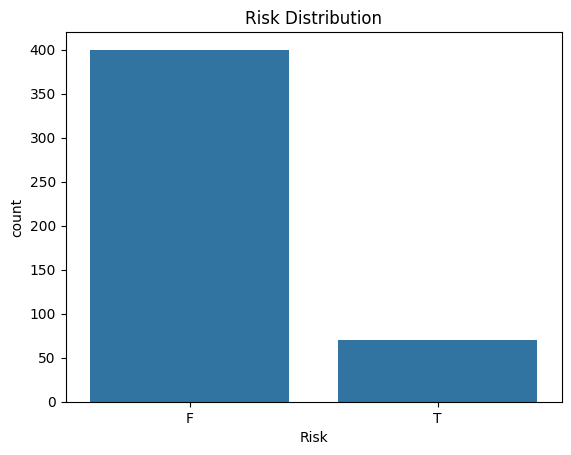

In [381]:
sns.countplot(x='Risk', data=df_copy)
plt.title('Risk Distribution')
plt.show()

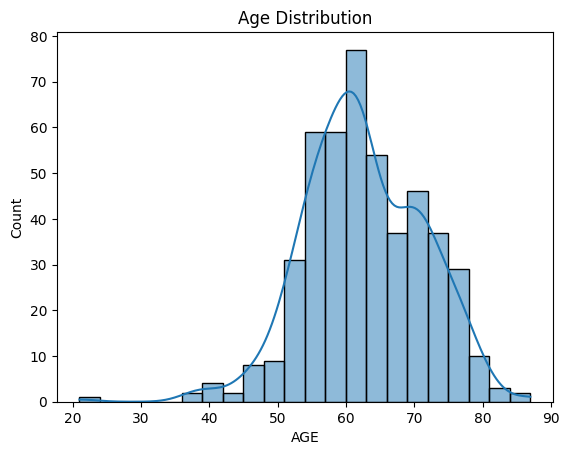

In [382]:
sns.histplot(df_copy['AGE'], kde=True)
plt.title('Age Distribution')
plt.show()

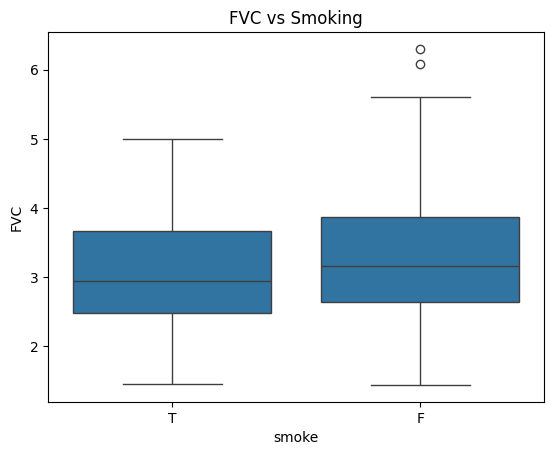

In [383]:
sns.boxplot(x='smoke', y='FVC', data=df_copy)
plt.title('FVC vs Smoking')
plt.show()

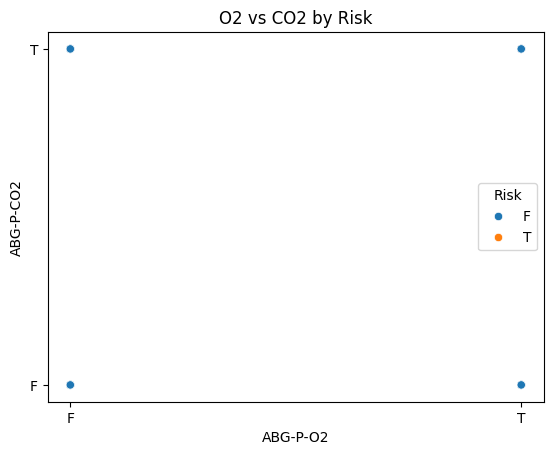

In [384]:
sns.scatterplot(x='ABG-P-O2', y='ABG-P-CO2', hue='Risk', data=df_copy)
plt.title('O2 vs CO2 by Risk')
plt.show()

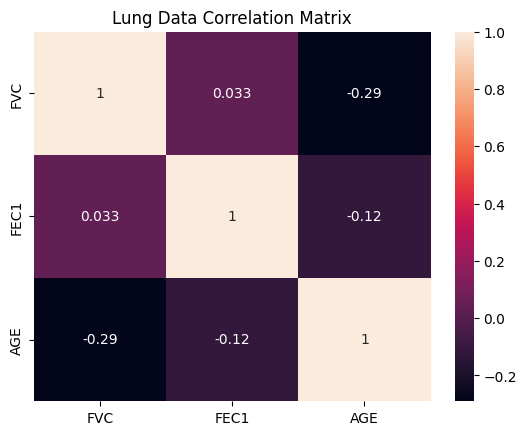

In [385]:
sns.heatmap(df_copy.corr(numeric_only=True), annot=True)
plt.title('Lung Data Correlation Matrix')
plt.show()

In [386]:
df['smoke'].value_counts()

,count
smoke,
F,413
T,57


In [387]:
# Define the mapping dictionary
smoke_mapping = {
    'T': 1,
    'F': 0
}

# Apply the mapping
df['smoke'] = df['smoke'].map(smoke_mapping)

In [388]:
df['PEFR'].value_counts()

,count
PEFR,
F,439
T,31


In [389]:
# Define the mapping dictionary
pefr_mapping = {
    'T': 1,
    'F': 0
}

# Apply the mapping
df['PEFR'] = df['PEFR'].map(pefr_mapping)

In [390]:
df['O2'].value_counts()

,count
O2,
F,401
T,69


In [391]:
# Define the mapping dictionary
o2_mapping = {
    'T': 1,
    'F': 0
}

# Apply the mapping
df['O2'] = df['O2'].map(o2_mapping)

In [392]:
df['ABG-P-O2'].value_counts()

,count
ABG-P-O2,
F,438
T,32


In [393]:
# Define the mapping dictionary
abgpo2_mapping = {
    'T': 1,
    'F': 0
}

# Apply the mapping
df['ABG-P-O2'] = df['ABG-P-O2'].map(abgpo2_mapping)

In [394]:
df['ABG-P-CO2'].value_counts()

,count
ABG-P-CO2,
T,323
F,147


In [395]:
# Define the mapping dictionary
abgpco2_mapping = {
    'T': 1,
    'F': 0
}

# Apply the mapping
df['ABG-P-CO2'] = df['ABG-P-CO2'].map(abgpco2_mapping)

In [396]:
df['ABG-pH Level'].value_counts()

,count
ABG-pH Level,
F,392
T,78


In [397]:
# Define the mapping dictionary
abgph_level_mapping = {
    'T': 1,
    'F': 0
}

# Apply the mapping
df['ABG-pH Level'] = df['ABG-pH Level'].map(abgph_level_mapping)

In [398]:
df['Scan'].value_counts()

,count
Scan,
MRI,257
X-ray,194
CT,19


In [399]:
# Define the mapping dictionary
scan_mapping = {
    'MRI': 1,
    'X-ray': 2,
    'CT': 3,
}

# Apply the mapping
df['Scan'] = df['Scan'].map(scan_mapping)

In [400]:
df['Asthama'].value_counts()

,count
Asthama,
F,431
T,39


In [401]:
# Define the mapping dictionary
asthama_mapping = {
    'T': 1,
    'F': 0
}

# Apply the mapping
df['Asthama'] = df['Asthama'].map(asthama_mapping)

In [402]:
df['Other diseaes'].value_counts()

,count
Other diseaes,
F,467
T,3


In [403]:
# Define the mapping dictionary
other_diseaes_mapping = {
    'T': 1,
    'F': 0
}

# Apply the mapping
df['Other diseaes'] = df['Other diseaes'].map(other_diseaes_mapping)

In [404]:
df['Risk'].value_counts()

,count
Risk,
F,400
T,70


In [405]:
# Define the mapping dictionary
risk_mapping = {
    'T': 1,
    'F': 0
}

# Apply the mapping
df['Risk'] = df['Risk'].map(risk_mapping)

In [406]:
df

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,1,2.85,2.16,0,0,0,1,1,2,0,0,60,0
1,Patient-2,0,3.40,1.88,0,0,0,0,0,1,1,0,51,0
2,Patient-3,0,2.76,2.08,0,0,0,1,0,2,0,0,59,0
3,Patient-4,0,3.68,3.04,0,0,0,0,0,2,0,0,54,0
4,Patient-5,0,2.44,0.96,0,1,0,1,1,2,0,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Patient-466,0,3.88,2.12,0,0,0,1,0,3,0,0,63,0
466,Patient-467,0,3.76,3.12,0,0,0,0,0,2,0,0,61,0
467,Patient-468,0,3.04,2.08,0,0,0,1,0,3,0,0,52,0
468,Patient-469,0,1.96,1.68,0,0,0,1,1,1,0,0,79,0


In [407]:
df.drop(columns=['Patient'],inplace=True)

In [408]:
correlation = df.corr()
correlation

,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
smoke,1.000000,-0.080036,0.126259,0.400193,0.711434,0.028958,0.053809,0.079541,-0.058202,-0.017243,-0.029776,0.091091,0.009348
FVC,-0.080036,1.000000,0.032989,0.019805,-0.094398,0.071316,-0.052817,-0.100403,-0.039076,-0.127339,-0.029608,-0.290146,-0.046342
FEC1,0.126259,0.032989,1.000000,0.161615,0.101453,0.255573,-0.099914,-0.086103,-0.024775,-0.027603,-0.016241,-0.115900,-0.042841
PEFR,0.400193,0.019805,0.161615,1.000000,0.277302,0.064297,-0.024115,-0.072455,0.040209,0.013290,-0.021299,0.044789,0.057375
O2,0.711434,-0.094398,0.101453,0.277302,1.000000,0.126543,0.085334,0.073506,-0.073789,0.005982,0.042242,0.087195,0.079759
ABG-P-O2,0.028958,0.071316,0.255573,0.064297,0.126543,1.000000,0.036593,-0.075164,-0.011686,-0.050687,-0.021664,-0.021452,0.100453
ABG-P-CO2,0.053809,-0.052817,-0.099914,-0.024115,0.085334,0.036593,1.000000,0.202245,-0.027434,0.003292,0.054070,0.149589,0.088860
ABG-pH Level,0.079541,-0.100403,-0.086103,-0.072455,0.073506,-0.075164,0.202245,1.000000,0.074552,0.052403,0.036058,0.208003,0.086467
Scan,-0.058202,-0.039076,-0.024775,0.040209,-0.073789,-0.011686,-0.027434,0.074552,1.000000,-0.030188,-0.022336,-0.082468,0.025423
Asthama,-0.017243,-0.127339,-0.027603,0.013290,0.005982,-0.050687,0.003292,0.052403,-0.030188,1.000000,-0.024110,0.085286,0.090806


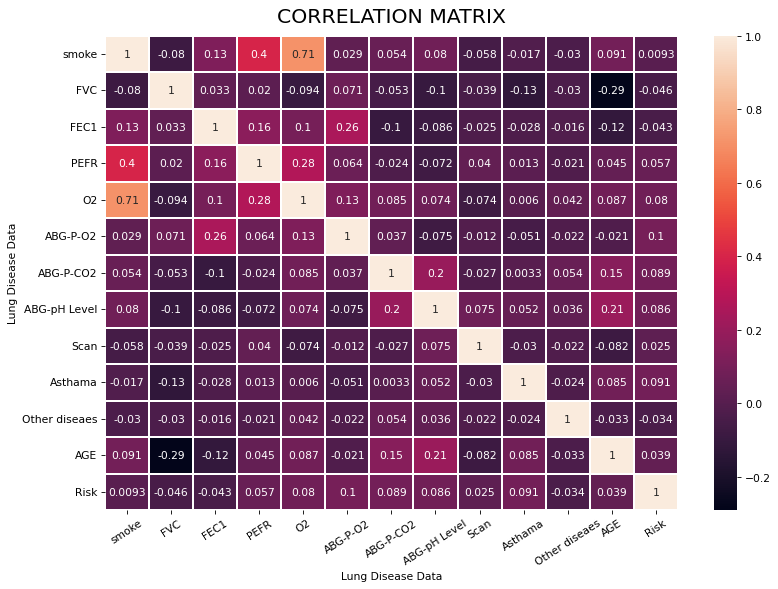

In [409]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Lung Disease Data')
plt.ylabel('Lung Disease Data')
plt.xticks(rotation=33)
plt.show()

In [410]:
X=df.drop(columns=['Risk'])
y=df['Risk']

In [411]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [412]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [413]:
from sklearn.linear_model import LogisticRegression

In [414]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [415]:
y_pred = model.predict(X_test)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [416]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.7978723404255319
Precision: 0.0
Recall (Sensitivity): 0.0
F1-Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


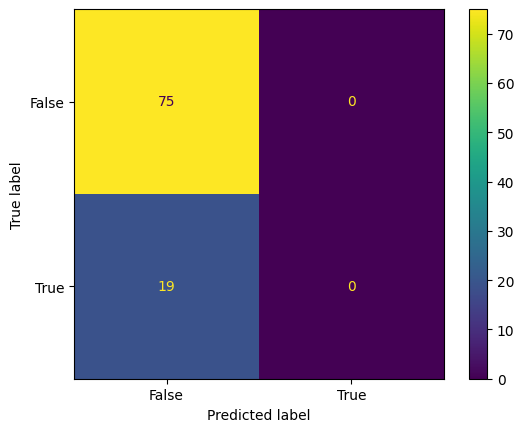

In [417]:
#confuison matrix for titanic dataset
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()